In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px

from datetime import datetime
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving udemy_courses (1).csv to udemy_courses (1).csv


In [ ]:
df = pd.read_csv("udemy_courses (1).csv")
df

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,2016-06-14T17:36:46Z,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,2017-03-10T22:24:30Z,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30T16:41:42Z,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11T19:06:15Z,Web Development


In [ ]:
print(f"Dataset shape: {df.shape}")

Dataset shape: (3678, 12)


In [ ]:
print("\nFirst Few rows")
display(df.head())


First Few rows


,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [ ]:
print(f"Missing Values per column")
print(df.isnull().sum())

Missing Values per column
course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64


In [ ]:
print("\nData Types:")
print(df.dtypes)


Data Types:
course_id                int64
course_title            object
url                     object
is_paid                   bool
price                    int64
num_subscribers          int64
num_reviews              int64
num_lectures             int64
level                   object
content_duration       float64
published_timestamp     object
subject                 object
dtype: object


In [ ]:
print(f"Basic Statistics:")
display(df.describe())

Basic Statistics:


,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


In [ ]:
print("\n-----DATA PREPROCESSING-----")


-----DATA PREPROCESSING-----


In [ ]:
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("coolwarm")
plt.rcParams['figure.figsize'] = (12, 8)

In [ ]:
#CONVERTING DATE COUMNS TO DATETIME FORMAT

df['published_timestamp'] = pd.to_datetime(df['published_timestamp'])


In [ ]:
#EXTRACT FEATURES FROM DATETIME
df['published_year'] = df['published_timestamp'].dt.year
df['published_month'] = df['published_timestamp'].dt.month
df['published_day'] = df['published_timestamp'].dt.day
df['published_dayofweek'] = df['published_timestamp'].dt.dayofweek

In [ ]:
df['content_duration_hours'] = pd.to_numeric(df['content_duration'], errors='coerce')
print("\nSample content_duration values:")
print(df['content_duration'].sample(10).values)


Sample content_duration values:
[ 1.5  3.5  5.5  2.5  2.   2.   2.   1.  42.   1. ]


In [ ]:
print("\nContent duration hours statistics:")
print(df['content_duration_hours'].describe())

# Create derived metrics
df['price_per_hour'] = df['price'] / df['content_duration_hours'].replace(0, np.nan)
df['price_per_hour'].fillna(df['price'], inplace=True)  # If no duration, use price

df['reviews_per_subscriber'] = df['num_reviews'] / df['num_subscribers'].replace(0, 1)
df['lectures_per_hour'] = df['num_lectures'] / df['content_duration_hours'].replace(0, 1)
df['engagement_score'] = (df['num_subscribers'] * 0.5 + df['num_reviews'] * 0.5) / (df['published_timestamp'].max() - df['published_timestamp']).dt.days.replace(0, 1)


Content duration hours statistics:
count    3678.000000
mean        4.094517
std         6.053840
min         0.000000
25%         1.000000
50%         2.000000
75%         4.500000
max        78.500000
Name: content_duration_hours, dtype: float64


In [ ]:
#ENCODING CATEGORICAL VALUES

label_encoder = LabelEncoder()
df['level_encoded'] = label_encoder.fit_transform(df['level'])
df['subject_encoded'] = label_encoder.fit_transform(df['subject'])

In [ ]:
print("\n-----EXPLORATORY DATA ANALYSIS-----")


-----EXPLORATORY DATA ANALYSIS-----


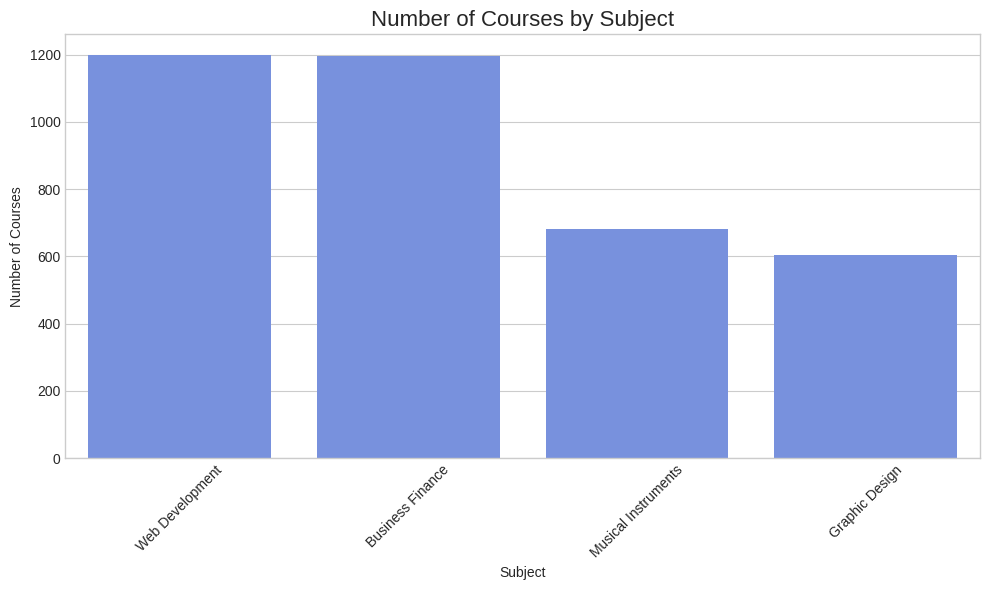

In [ ]:
plt.figure(figsize=(10,6))
subject_counts = df['subject'].value_counts()
sns.barplot(x=subject_counts.index,y=subject_counts.values)
plt.title('Number of Courses by Subject',fontsize=16)
plt.xlabel('Subject')
plt.ylabel('Number of Courses')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

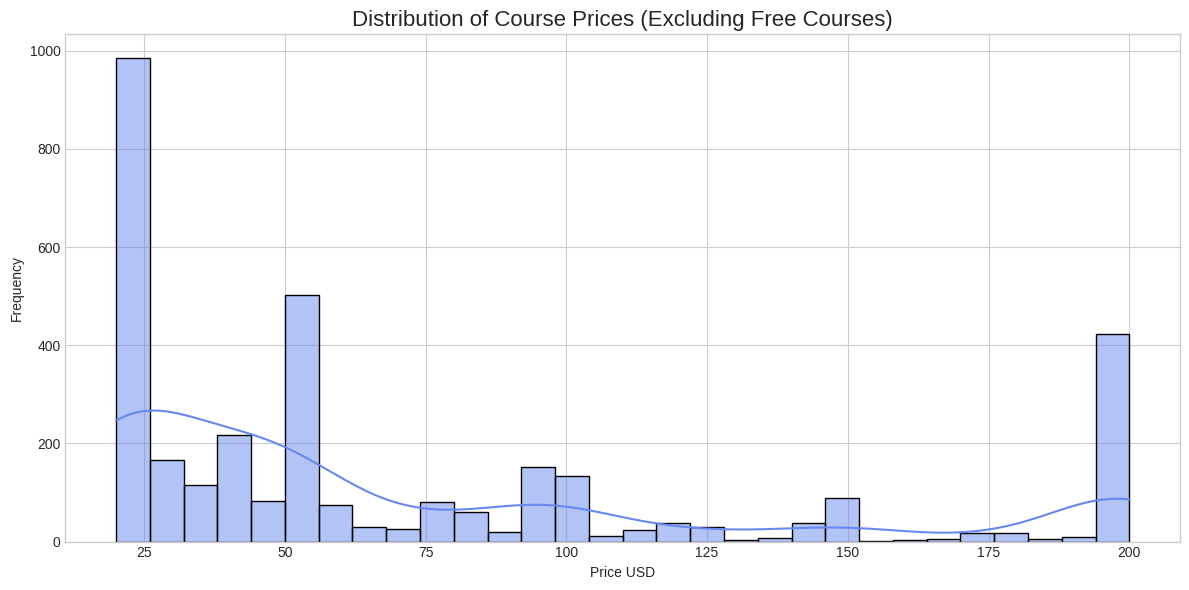

In [ ]:
plt.figure(figsize=(12,6))
df_paid = df[df['price']>0]
sns.histplot(df_paid['price'],bins=30,kde=True)
plt.title('Distribution of Course Prices (Excluding Free Courses)', fontsize=16)
plt.xlabel('Price USD')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

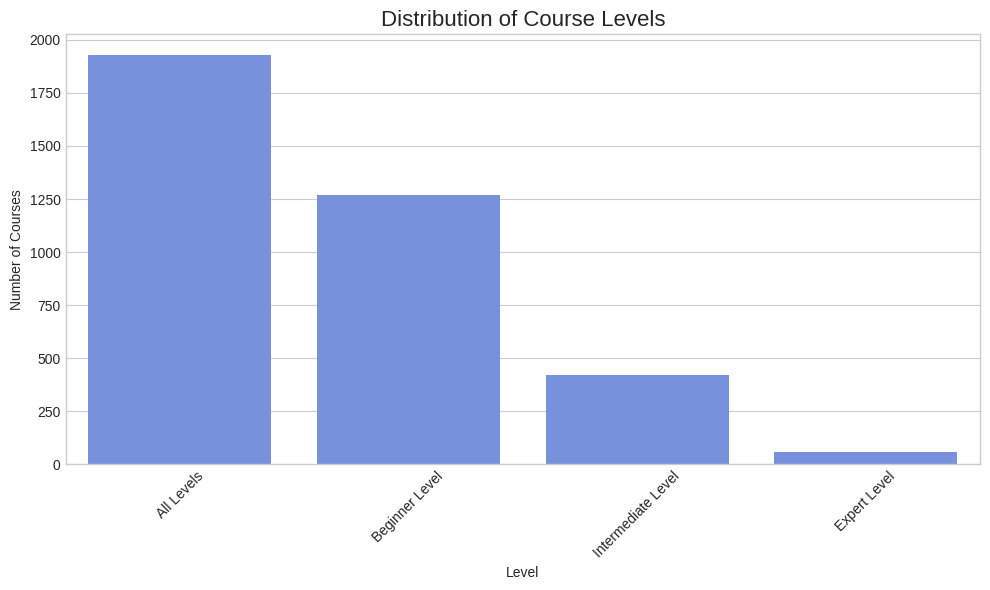

In [ ]:
plt.figure(figsize=(10, 6))
level_counts = df['level'].value_counts()
sns.barplot(x=level_counts.index, y=level_counts.values)
plt.title('Distribution of Course Levels', fontsize=16)
plt.xlabel('Level')
plt.ylabel('Number of Courses')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:

fig = px.scatter(df, x='price', y='num_subscribers', color='subject',
                 size='num_lectures', hover_name='course_title',
                 log_y=True, size_max=60,
                 labels={'price':'Price (USD)', 'num_subscribers':'Number of Subscribers (log scale)'},
                 title='Price vs Subscribers by Subject')
fig.update_layout(height=600, width=900)
fig.show()

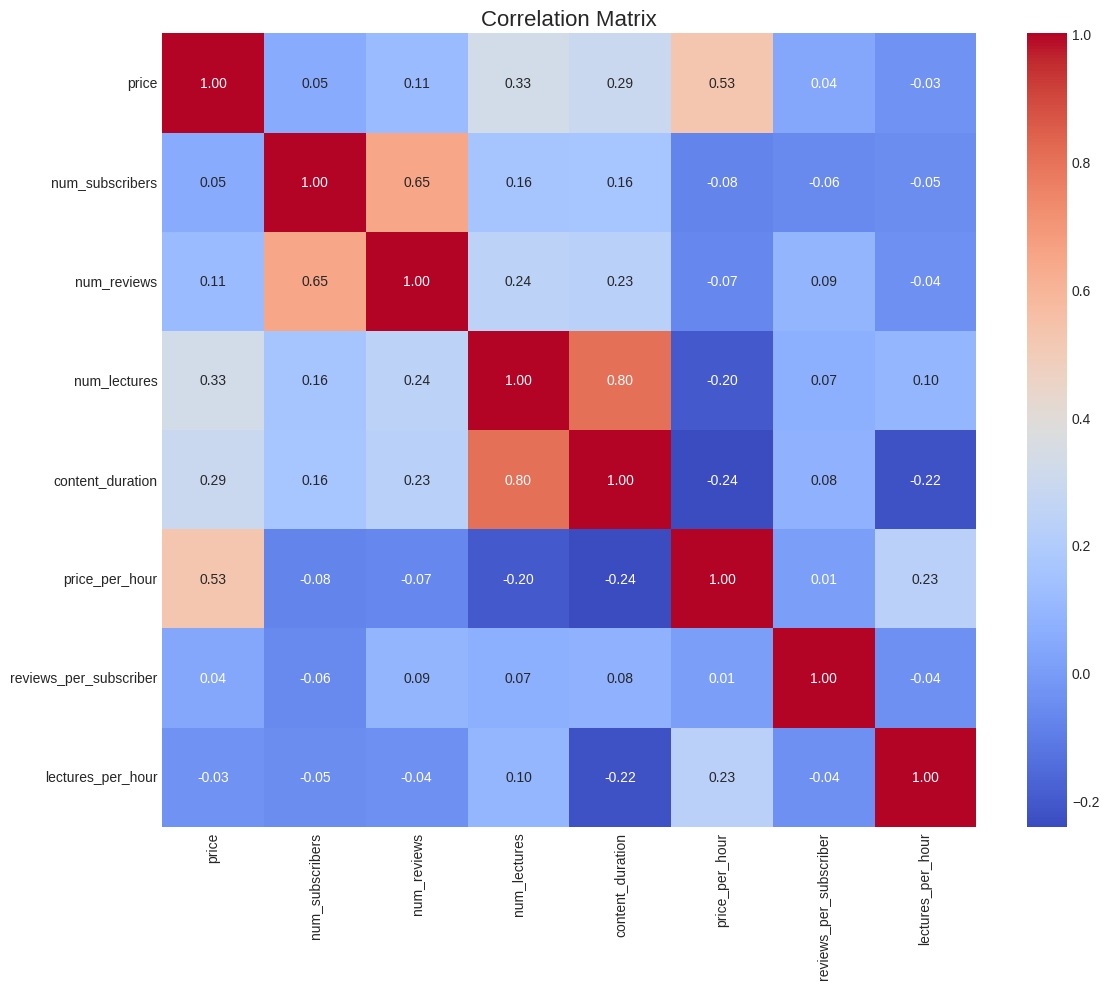

In [ ]:
numeric_cols = ['price', 'num_subscribers', 'num_reviews', 'num_lectures',
                'content_duration', 'price_per_hour', 'reviews_per_subscriber',
                'lectures_per_hour']

# Convert to numeric to avoid dtype issues
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Handling NaN values
correlation = df[numeric_cols].dropna().corr()

# Plot heatmap

plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix', fontsize=16)
plt.tight_layout()
plt.show()

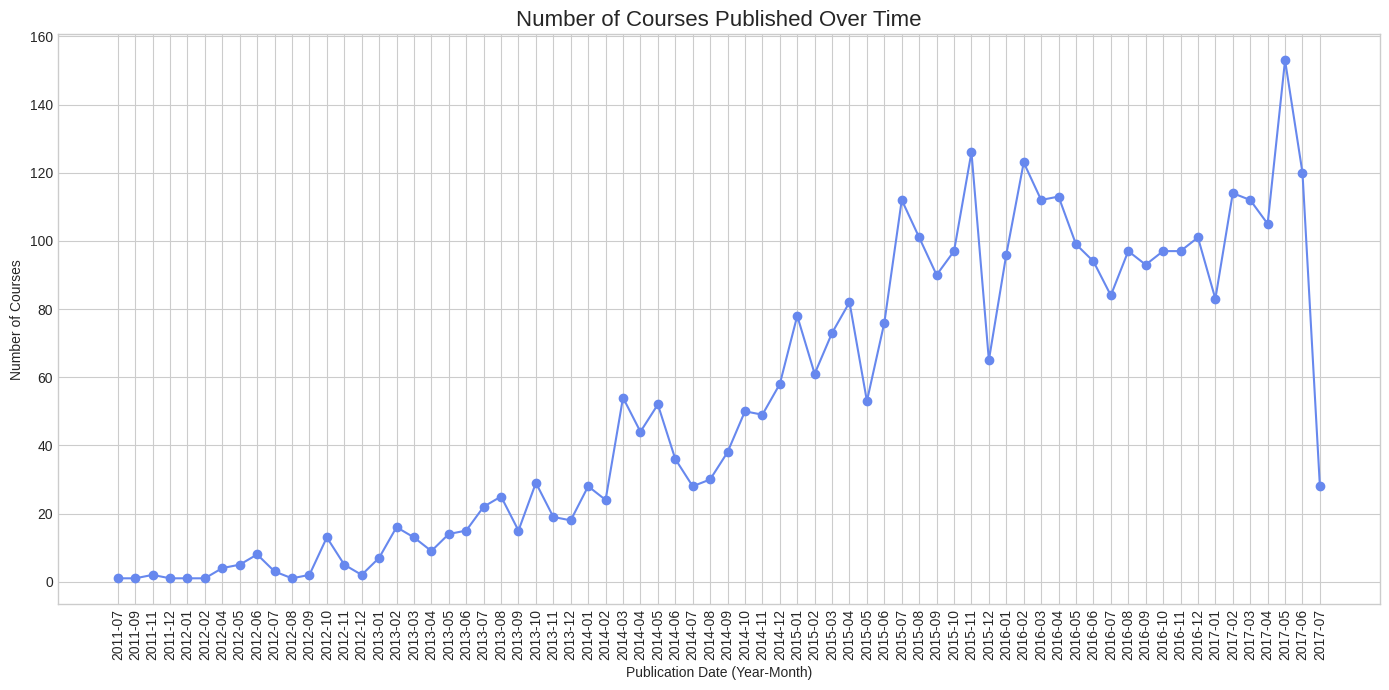

In [ ]:
plt.figure(figsize=(14, 7))
df['published_year_month'] = df['published_timestamp'].dt.to_period('M')
courses_per_month = df.groupby(['published_year_month']).size()
courses_per_month = courses_per_month.reset_index()
courses_per_month['published_year_month'] = courses_per_month['published_year_month'].astype(str)
plt.plot(courses_per_month['published_year_month'], courses_per_month[0], marker='o')
plt.title('Number of Courses Published Over Time', fontsize=16)
plt.xlabel('Publication Date (Year-Month)')
plt.ylabel('Number of Courses')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
avg_price = df.groupby(['subject', 'level'])['price'].mean().reset_index()
fig = px.bar(avg_price, x='subject', y='price', color='level',
             barmode='group',
             labels={'price':'Average Price (USD)', 'subject':'Subject'},
             title='Average Course Price by Subject and Level')
fig.update_layout(height=500, width=900)
fig.show()

In [ ]:
fig = px.scatter(df, x='num_lectures', y='num_subscribers',
                 color='content_duration_hours', size='num_reviews',
                 hover_name='course_title', log_y=True,
                 labels={'num_lectures':'Number of Lectures',
                         'num_subscribers':'Number of Subscribers (log scale)',
                         'content_duration_hours':'Content Duration (hours)'},
                 title='Number of Subscribers vs. Number of Lectures')
fig.update_layout(height=600, width=900)
fig.show()

In [ ]:
print("\n-----MACHINE LEARNING MODELS-----")


-----MACHINE LEARNING MODELS-----


In [ ]:
date_cols = df.select_dtypes(include=['datetime64','datetime','object']).columns
for col in date_cols:
  if pd.to_datetime(df[col],errors='coerce').notna().sum() > 0:
    df.drop(columns=col,inplace=True)

In [ ]:
#feature engineering
if 'price' in df.columns and 'content_duration' in df.columns:
  df['price_per_hour'] =df['price'] / df['content_duration']
if 'num_reviews' in df.columns and 'num_subscribers' in df.columns:
  df['reviews_per_subscriber'] = df['num_reviews'] / df['num_subscribers'].replace(0,1)
if 'num_lectures' in df.columns and 'content_duration' in df.columns:
  df['lectures_per_hour'] = df['num_lectures'] / df['content_duration']

In [ ]:
#remove outliers (top 1%) in selected numeric columns
for col in ['price','num_subscribers','num_reviews','content_duration','price_per_hour']:
  if col in df.columns:
    upper_limit = df[col].quantile(0.99)
    df = df[df[col] <= upper_limit]


In [ ]:
# log transform skewed numeric variables
for col in ['num_subscribers','num_reviews']:
  if col in df.columns:
    df[col] = np.log1p(df[col])

In [ ]:
if 'price' not in df.columns:
  raise ValueError("'price' column is missing in the dataset")
X = df.drop(['price'],axis=1)
y = df['price']

In [ ]:
X = X.select_dtypes(include=['number'])

In [ ]:
X = pd.get_dummies(X,drop_first=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
models = {
    'GradientBoosting' : GradientBoostingRegressor(),
    'RandomForest' : RandomForestRegressor(),
    'Ridge' : Ridge(),
    'Lasso' : Lasso(),
    'SVR' : SVR()
}

In [ ]:
results ={}

In [ ]:
for name, model in models.items():
  pipe = Pipeline([
      ('scaler',StandardScaler()),
      ('model',model)
  ])
  pipe.fit(X_train,y_train)
  preds = pipe.predict(X_test)
  results[name] = {
      'R2': r2_score(y_test,preds),
      'MAE':mean_absolute_error(y_test,preds),
      'RMSE':np.sqrt(mean_squared_error(y_test,preds))
  }

In [ ]:
results_df = pd.DataFrame(results).T.sort_values(by='R2',ascending=False)
print('\nModel Evaluation Metrics:')
print(results_df)


Model Evaluation Metrics:
                        R2        MAE       RMSE
RandomForest      0.996092   1.496761   3.562759
GradientBoosting  0.989900   4.079835   5.727574
Lasso             0.630583  23.068448  34.638522
Ridge             0.618672  23.264067  35.192539
SVR               0.452554  26.787841  42.166906


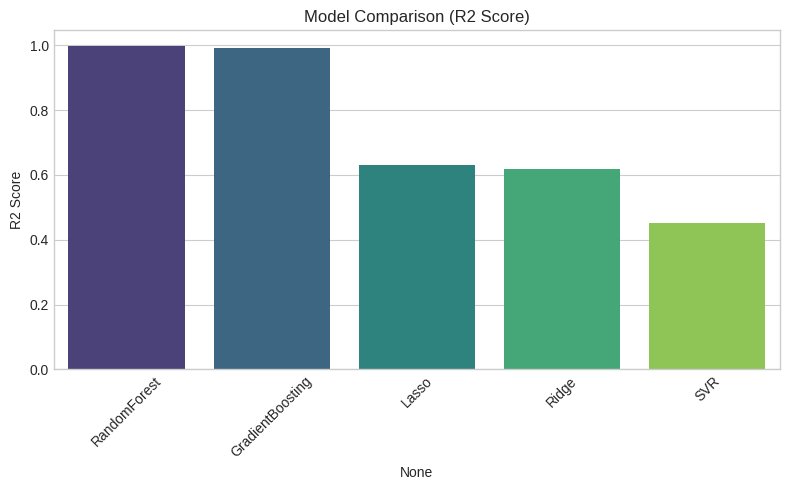

In [ ]:
#PLOTTING R2 COMPARISON
plt.figure(figsize=(8,5))
sns.barplot(x=results_df.index,y='R2',data=results_df,palette ='viridis')
plt.ylabel('R2 Score')
plt.title('Model Comparison (R2 Score)')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [ ]:
#FEATURE IMPORTANCE

model_to_use ='RandomForest'
model = models[model_to_use]

model.fit(X_train,y_train)

RandomForestRegressor()

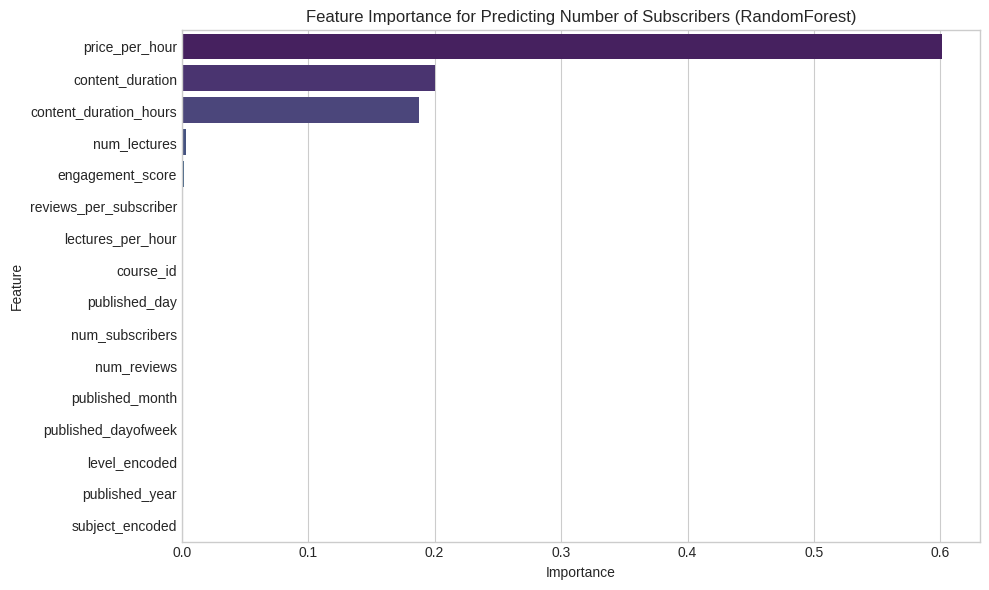

In [ ]:
if hasattr(model, 'feature_importances_'):
    feature_importance = model.feature_importances_

    # Create a DataFrame for feature importance and corresponding feature names
    importance_df = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': feature_importance
    })

    # Sort by importance
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Plotting the feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
    plt.title(f'Feature Importance for Predicting Number of Subscribers ({model_to_use})')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()
else:
    print(f"The model '{model_to_use}' does not support feature importance.")

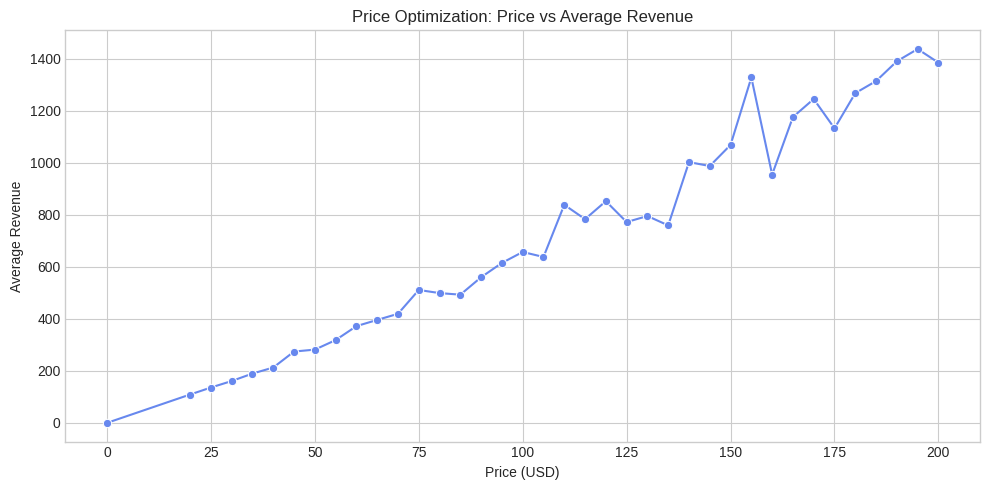

In [ ]:
# Add a revenue column
df['revenue'] = df['price'] * df['num_subscribers']

# Group by price and calculate average subscribers and revenue
price_analysis = df.groupby('price').agg({
    'num_subscribers': 'mean',
    'revenue': 'mean'
}).reset_index()

# Plot price vs average revenue
plt.figure(figsize=(10, 5))
sns.lineplot(data=price_analysis, x='price', y='revenue', marker='o')
plt.title('Price Optimization: Price vs Average Revenue')
plt.xlabel('Price (USD)')
plt.ylabel('Average Revenue')
plt.tight_layout()
plt.show()


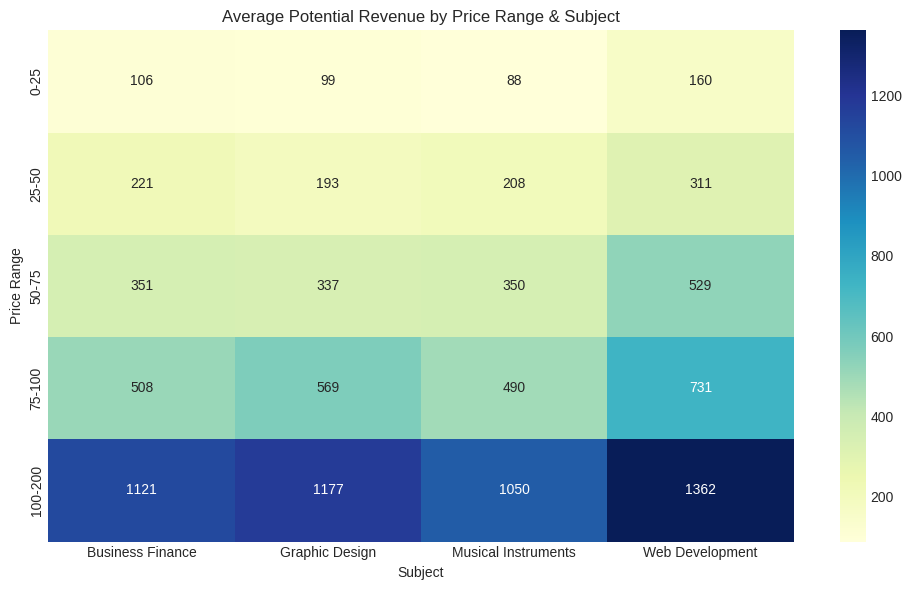

In [ ]:
# Define price bins
bins = [0, 25, 50, 75, 100, 200]
labels = ['0-25', '25-50', '50-75', '75-100', '100-200']
df['price_range'] = pd.cut(df['price'], bins=bins, labels=labels)

# Group by price range and subject
revenue_by_range_subject = df.groupby(['price_range', 'subject'])['revenue'].mean().unstack()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(revenue_by_range_subject, cmap='YlGnBu', annot=True, fmt=".0f")
plt.title('Average Potential Revenue by Price Range & Subject')
plt.xlabel('Subject')
plt.ylabel('Price Range')
plt.tight_layout()
plt.show()


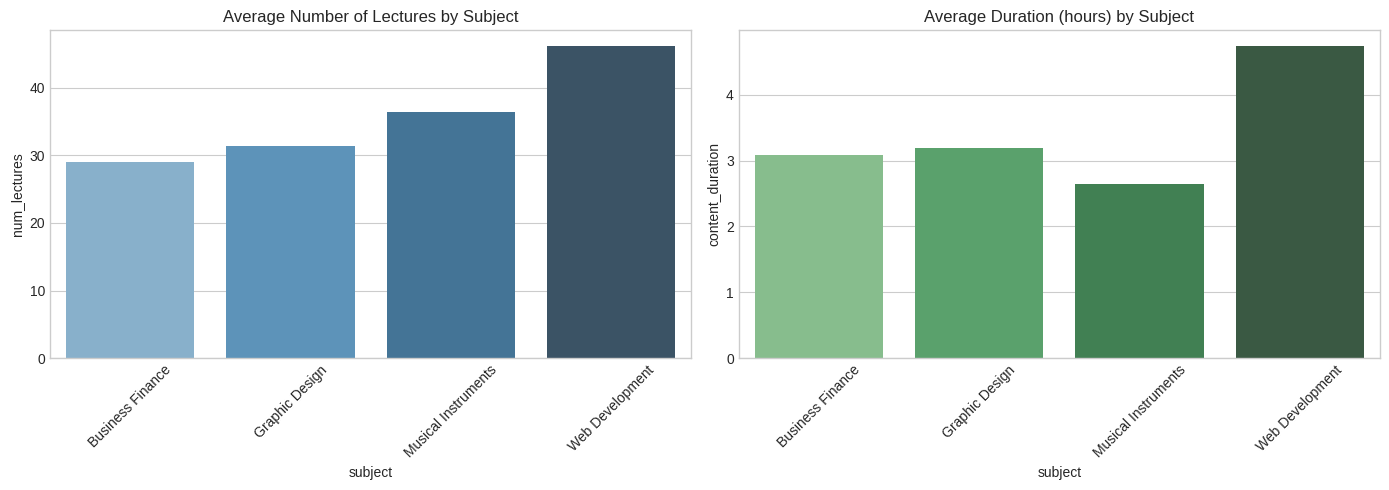

In [ ]:
content_analysis = df.groupby('subject').agg({
    'num_lectures': 'mean',
    'content_duration': 'mean'
}).reset_index()

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.barplot(data=content_analysis, x='subject', y='num_lectures', ax=axes[0], palette='Blues_d')
axes[0].set_title('Average Number of Lectures by Subject')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

sns.barplot(data=content_analysis, x='subject', y='content_duration', ax=axes[1], palette='Greens_d')
axes[1].set_title('Average Duration (hours) by Subject')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()


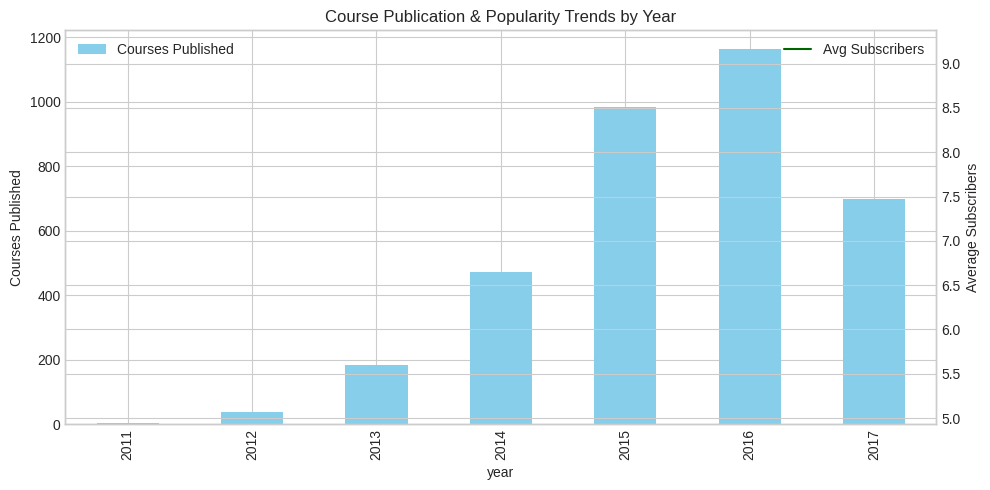

In [ ]:
# Convert 'published_timestamp' to datetime
df['published_timestamp'] = pd.to_datetime(df['published_timestamp'], errors='coerce')
df['year'] = df['published_timestamp'].dt.year

# Number of courses published per year
courses_per_year = df['year'].value_counts().sort_index()

# Average subscribers per year
subscribers_per_year = df.groupby('year')['num_subscribers'].mean()

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 5))
courses_per_year.plot(kind='bar', color='skyblue', label='Courses Published', ax=ax1)
ax1.set_ylabel('Courses Published')
ax1.set_title('Course Publication & Popularity Trends by Year')

# Secondary axis
ax2 = ax1.twinx()
subscribers_per_year.plot(color='darkgreen', label='Avg Subscribers', ax=ax2)
ax2.set_ylabel('Average Subscribers')

# Legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


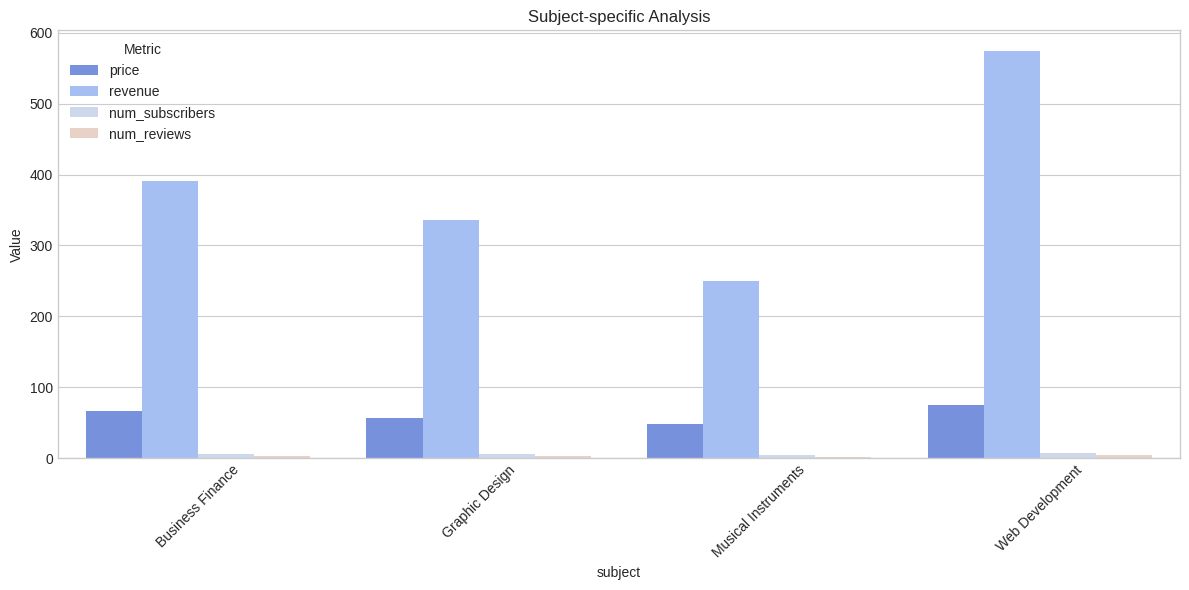

In [ ]:
subject_analysis = df.groupby('subject').agg({
    'price': 'mean',
    'revenue': 'mean',
    'num_subscribers': 'mean',
    'num_reviews': 'mean'
}).reset_index()

# Plot
subject_analysis_melted = subject_analysis.melt(id_vars='subject', var_name='Metric', value_name='Value')

plt.figure(figsize=(12, 6))
sns.barplot(data=subject_analysis_melted, x='subject', y='Value', hue='Metric')
plt.title('Subject-specific Analysis')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
